In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [8]:
# print(cities)

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

# Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

# Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

# Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kingman
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | acajutla
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | lardos
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | karakol
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | ati
Processing Record 20 of Set 1 | ardistan
City not found. Skipping...
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | carnarvon
P

Processing Record 36 of Set 4 | maryborough
Processing Record 37 of Set 4 | mangan
Processing Record 38 of Set 4 | havre-saint-pierre
Processing Record 39 of Set 4 | jasper
Processing Record 40 of Set 4 | centralia
Processing Record 41 of Set 4 | mundra
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | yellowknife
Processing Record 44 of Set 4 | yibin
Processing Record 45 of Set 4 | fukue
Processing Record 46 of Set 4 | pilar
Processing Record 47 of Set 4 | gazanjyk
Processing Record 48 of Set 4 | rampur
Processing Record 49 of Set 4 | kununurra
Processing Record 50 of Set 4 | moranbah
Processing Record 1 of Set 5 | urusha
Processing Record 2 of Set 5 | batagay
Processing Record 3 of Set 5 | acapulco
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | labytnangi
Processing Record 6 of Set 5 | san cristobal
Processing Record 7 of Set 5 | kisangani
Processing Record 8 of Set 5 | ketchikan
Processing Record 9 of Set 5 | hasaki
Processing Record

Processing Record 23 of Set 8 | nanae
Processing Record 24 of Set 8 | wellington
Processing Record 25 of Set 8 | rivne
Processing Record 26 of Set 8 | komsomolskiy
Processing Record 27 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 28 of Set 8 | poum
Processing Record 29 of Set 8 | jomalig
City not found. Skipping...
Processing Record 30 of Set 8 | viligili
City not found. Skipping...
Processing Record 31 of Set 8 | zhigansk
Processing Record 32 of Set 8 | dien bien
City not found. Skipping...
Processing Record 33 of Set 8 | pisco
Processing Record 34 of Set 8 | bosobolo
Processing Record 35 of Set 8 | tambacounda
Processing Record 36 of Set 8 | bambous virieux
Processing Record 37 of Set 8 | praia da vitoria
Processing Record 38 of Set 8 | sorland
Processing Record 39 of Set 8 | abu kamal
Processing Record 40 of Set 8 | kulhudhuffushi
Processing Record 41 of Set 8 | mountain home
Processing Record 42 of Set 8 | talaya
Processing Record 43 of Set 8 | codrington
Pro

Processing Record 9 of Set 12 | mitsamiouli
Processing Record 10 of Set 12 | esqueda
Processing Record 11 of Set 12 | mehamn
Processing Record 12 of Set 12 | chikoy
City not found. Skipping...
Processing Record 13 of Set 12 | richards bay
Processing Record 14 of Set 12 | namibe
Processing Record 15 of Set 12 | auki
Processing Record 16 of Set 12 | byron bay
Processing Record 17 of Set 12 | havelock
Processing Record 18 of Set 12 | niono
Processing Record 19 of Set 12 | labuan
Processing Record 20 of Set 12 | bonfim
Processing Record 21 of Set 12 | caravelas
Processing Record 22 of Set 12 | oda
Processing Record 23 of Set 12 | zwedru
Processing Record 24 of Set 12 | toliary
City not found. Skipping...
Processing Record 25 of Set 12 | monte alegre
Processing Record 26 of Set 12 | northam
Processing Record 27 of Set 12 | gao
Processing Record 28 of Set 12 | port-cartier
Processing Record 29 of Set 12 | nome
Processing Record 30 of Set 12 | macau
Processing Record 31 of Set 12 | butajira
P

In [11]:
len(city_data)

576

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kingman,35.1894,-114.0530,67.48,21,80,12.64,US,2022-03-20 04:57:48
1,Pevek,69.7008,170.3133,-0.53,76,23,13.94,RU,2022-03-20 04:57:49
2,Punta Arenas,-53.1500,-70.9167,48.31,66,0,11.50,CL,2022-03-20 04:57:49
3,Ushuaia,-54.8000,-68.3000,38.52,86,100,10.74,AR,2022-03-20 04:53:07
4,Tiksi,71.6872,128.8694,10.81,77,100,24.32,RU,2022-03-20 04:57:49
5,Saskylakh,71.9167,114.0833,9.36,92,100,2.71,RU,2022-03-20 04:57:50
6,Acajutla,13.5928,-89.8275,81.01,75,78,3.56,SV,2022-03-20 04:57:50
7,Faanui,-16.4833,-151.7500,82.83,73,22,15.95,PF,2022-03-20 04:57:50
8,Lardos,36.0942,28.0157,42.94,47,1,10.94,GR,2022-03-20 04:57:51
9,Albany,42.6001,-73.9662,53.38,91,50,8.66,US,2022-03-20 04:57:51


In [30]:
new_column_order = ["City","Country","Date", "Lat","Lng", "Max Temp","Humidity","Cloudiness", "Wind Speed"]

In [31]:
# Changing column order DataFrame.
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kingman,US,2022-03-20 04:57:48,35.1894,-114.0530,67.48,21,80,12.64
1,Pevek,RU,2022-03-20 04:57:49,69.7008,170.3133,-0.53,76,23,13.94
2,Punta Arenas,CL,2022-03-20 04:57:49,-53.1500,-70.9167,48.31,66,0,11.50
3,Ushuaia,AR,2022-03-20 04:53:07,-54.8000,-68.3000,38.52,86,100,10.74
4,Tiksi,RU,2022-03-20 04:57:49,71.6872,128.8694,10.81,77,100,24.32


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

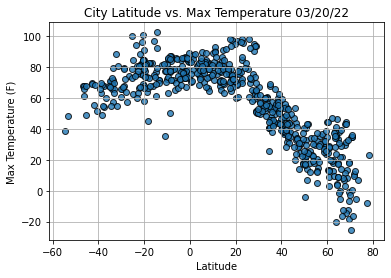

In [23]:
# Import time module
import time
from datetime import datetime

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

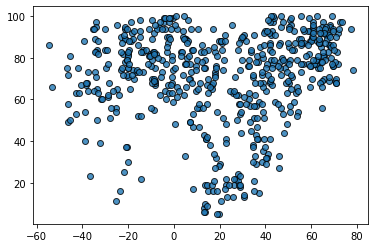

In [24]:
# Scatter plot carpares latitude vs humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Show plot
plt.show

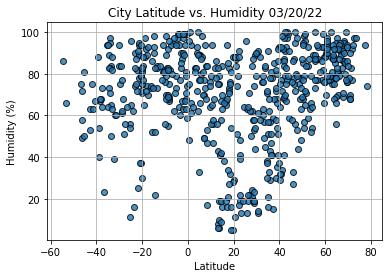

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

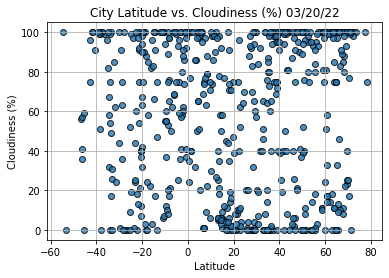

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

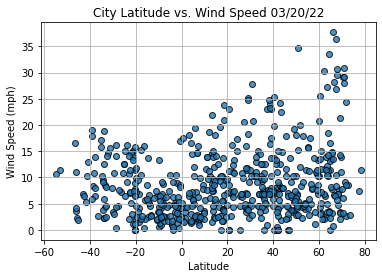

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
index13 = city_data_df.loc[13]
index13

City                  Port Alfred
Country                        ZA
Date          2022-03-20 04:57:52
Lat                      -33.5906
Lng                        26.891
Max Temp                    71.82
Humidity                       84
Cloudiness                     17
Wind Speed                   4.32
Name: 13, dtype: object

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kingman,US,2022-03-20 04:57:48,35.1894,-114.0530,67.48,21,80,12.64
1,Pevek,RU,2022-03-20 04:57:49,69.7008,170.3133,-0.53,76,23,13.94
4,Tiksi,RU,2022-03-20 04:57:49,71.6872,128.8694,10.81,77,100,24.32
5,Saskylakh,RU,2022-03-20 04:57:50,71.9167,114.0833,9.36,92,100,2.71
6,Acajutla,SV,2022-03-20 04:57:50,13.5928,-89.8275,81.01,75,78,3.56
...,...,...,...,...,...,...,...,...,...
570,Laguna,US,2022-03-20 05:13:27,38.4210,-121.4238,55.54,82,75,6.91
571,Chapleau,CA,2022-03-20 05:13:28,47.8405,-83.4034,30.90,97,100,9.19
572,Muravlenko,RU,2022-03-20 05:13:28,63.7898,74.5230,23.70,92,85,14.36
573,Gravdal,NO,2022-03-20 05:13:29,68.1214,13.5031,42.89,90,98,30.65


In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

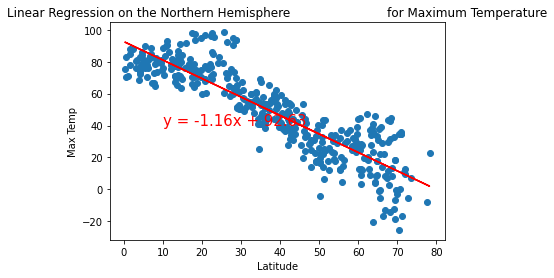

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

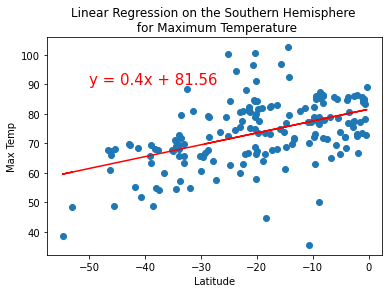

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

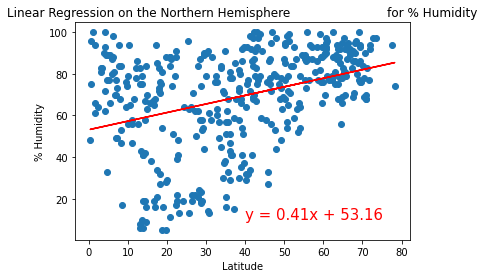

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

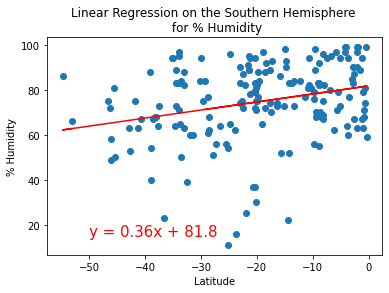

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

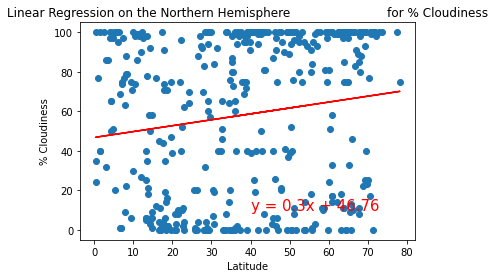

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

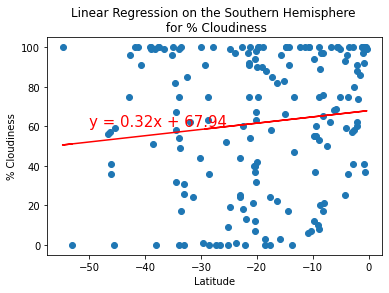

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

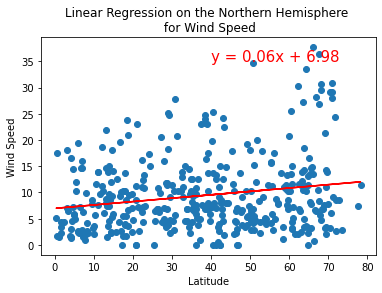

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

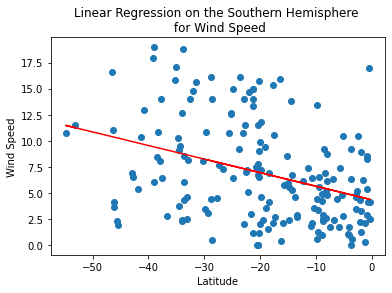

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))